In [1]:
import time
import os
import sys

import numpy as np
import matplotlib
matplotlib.use('nbagg')
#from matplotlib import style
#style.use('ggplot')
import matplotlib.pyplot as plt

import astropy.units as u
from astropy import stats, wcs
from astropy.io import fits
from astropy.convolution import Gaussian2DKernel

from mmtwfs.wfs import *
from mmtwfs.zernike import ZernikeVector
from mmtwfs.telescope import MMT
import poppy
import photutils

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.append("/Users/tim/src/cwfs/python")
%cd /Users/tim/MMT/mmirs/2019.0115/

/Users/tim/MMT/mmirs/2019.0115


In [4]:
from lsst.cwfs.instrument import Instrument
from lsst.cwfs.algorithm import Algorithm
from lsst.cwfs.image import Image, readFile
import lsst.cwfs.plots as plots

In [5]:
6.5024 * 2.85  # effective focal length for MMIRS's f/2.85 imaging

18.53184

In [6]:
2.85**2 / 1.25**2 * .5e-3  # MMIRS images at f/2.85 and we used +/- 500 um focus offsets

0.0025992000000000003

In [7]:
(10246.1 - 9245.18) / 2

500.46000000000004

In [8]:
2.85**2 / 1.25**2 * .5e-3  # MMIRS images at f/2.85 and we used +/- 500 um focus offsets

0.0025992000000000003

In [64]:
extra_whole = fits.open("tyc3778-00232-1.5990.fits")[11].data
intra_whole = fits.open("tyc3778-00232-1.5991.fits")[11].data
extra = extra_whole[981-40:981+40, 992-40:992+40] - np.median(extra_whole)
intra = intra_whole[981-40:981+40, 994-40:994+40] - np.median(intra_whole)

<IPython.core.display.Javascript object>


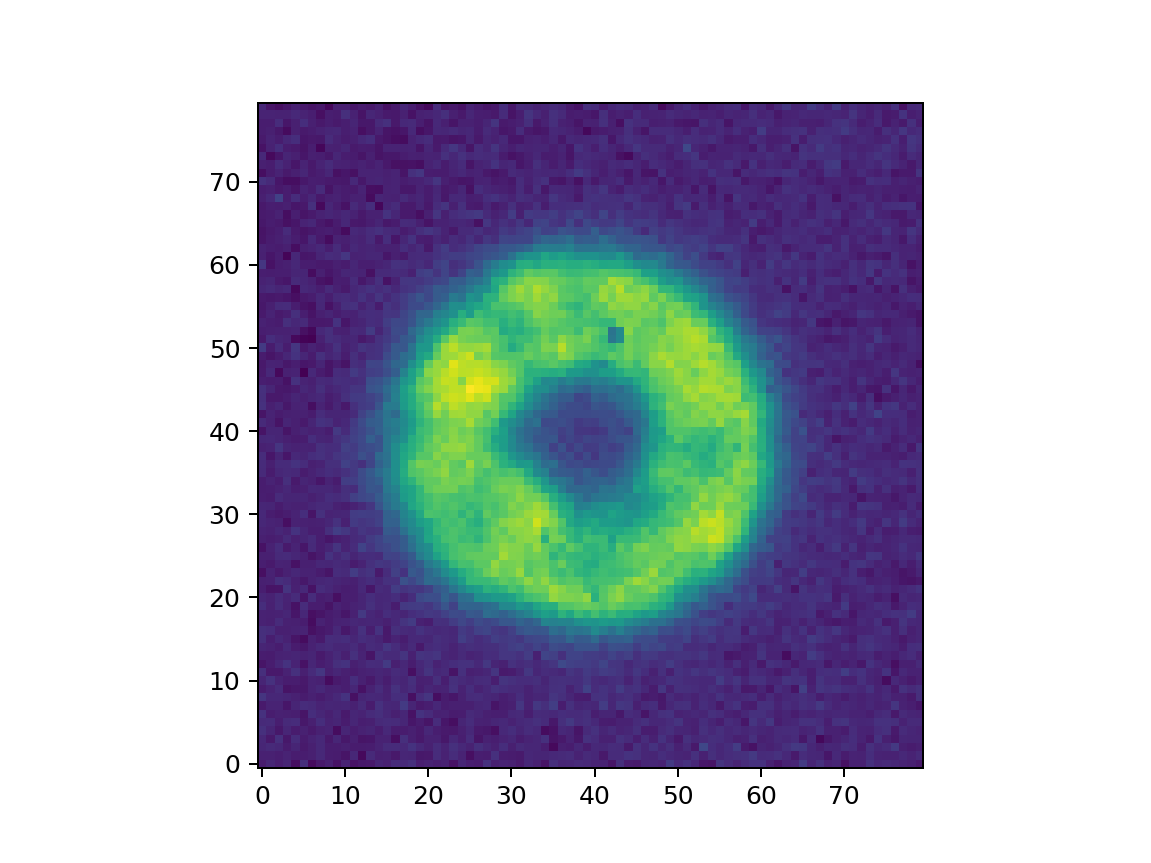

In [65]:
plt.imshow(intra, origin='lower')
plt.show()

<IPython.core.display.Javascript object>


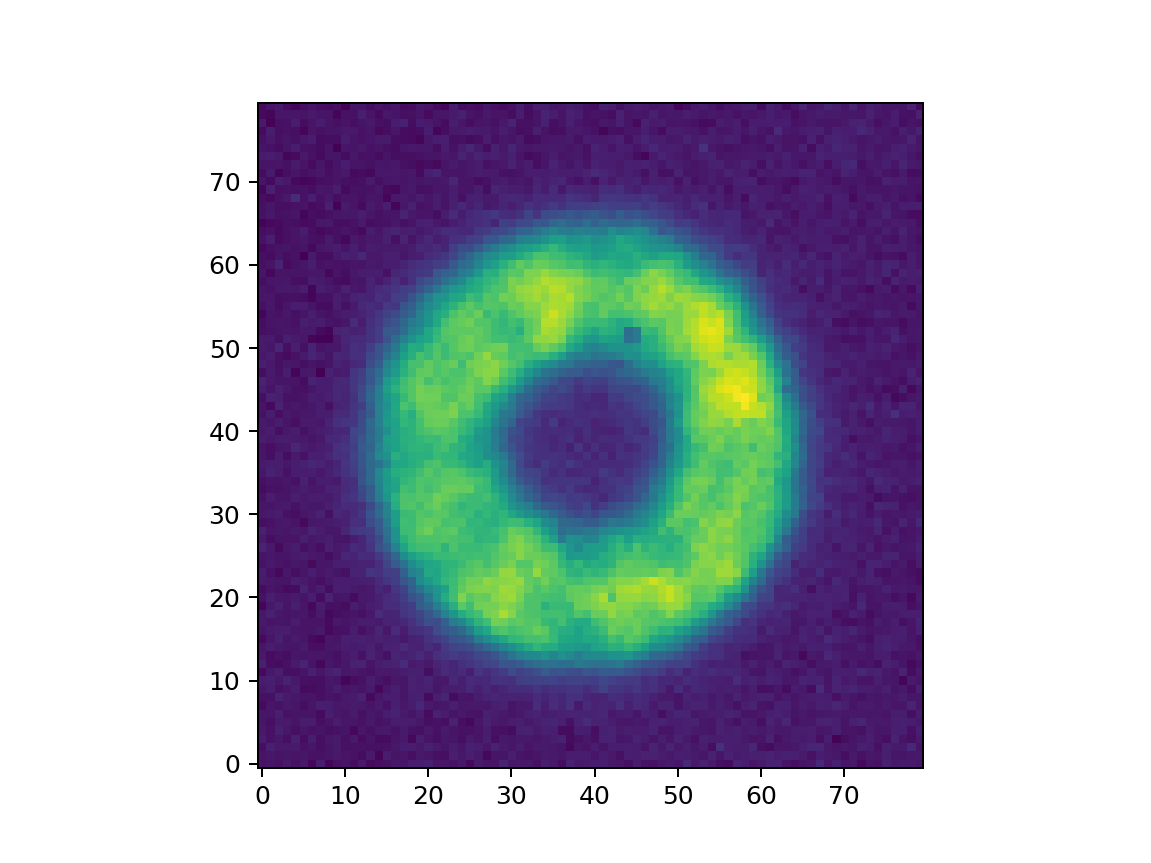

In [59]:
plt.imshow(extra, origin='lower')
plt.show()

In [66]:
fits.writeto("intra.fits", intra, overwrite=True)
fits.writeto("extra.fits", extra, overwrite=True)

In [67]:
fieldXY = [0., 0.]
I1 = Image(readFile("intra.fits"), fieldXY, Image.INTRA)
I2 = Image(readFile("extra.fits"), fieldXY, Image.EXTRA)

In [68]:
mmirs = Instrument('mmirs', I1.sizeinPix)

In [69]:
algo = Algorithm('exp', mmirs, 3)

In [70]:
algo.runIt(mmirs, I1, I2, 'onAxis')

resetting images: I1 and I2
imageCoCenter: (x1,y1)=(   39.60,   39.84)

imageCoCenter: (x1,y1)=(   39.91,   39.11)

itr = 0, z4-z22
[ 671.   69. -159.   38.   34.   12.   -8. -167.   16.   -3.  -34.   -4.
   16.   -6.    7.    7.    1.   -9.   21.]
itr = 1, z4-z22
[ 787.   73. -182.   32.   50.   14.   -5. -154.   16.   -2.  -29.  -10.
    5.   -7.    7.    8.    0.   -8.   36.]
itr = 2, z4-z22
[ 847.   76. -182.   28.   54.   14.   -4. -146.   15.   -2.  -27.  -13.
    1.   -7.    7.    8.   -1.   -8.   44.]
itr = 3, z4-z22
[ 881.   91. -216.   25.   56.   13.   -5. -142.   11.   -0.  -24.  -14.
   -2.   -7.    7.    8.   -1.   -9.   48.]
itr = 4, z4-z22
[ 895.   96. -241.   24.   56.   13.   -3. -141.    8.    0.  -24.  -15.
    3.   -6.    8.    9.   -1.   -9.   50.]
itr = 5, z4-z22
[ 814.   99. -244.   25.   56.   18.   -5. -158.    8.    1.  -25.  -13.
    5.   -3.    8.    9.    0.   -8.   40.]
itr = 6, z4-z22
[ 757.  101. -235.   27.   50.   20.  -10. -167.    8.    1.  -27.  -1

In [71]:
zv = ZernikeVector()
zv.from_array(algo.zer4UpNm, modestart=4, normalized=True)
zv.denormalize()
zv

Fringe Coefficients
 Z04:                  1530 nm 	 Defocus (2, 0)
 Z05:                 270.9 nm 	 Primary Astig at 45° (2, -2)
 Z06:                -568.2 nm 	 Primary Astig at 0° (2, 2)
 Z07:                  37.5 nm 	 Primary Y Coma (3, -1)
 Z08:                 91.37 nm 	 Primary X Coma (3, 1)
 Z09:                 140.1 nm 	 Y Trefoil (3, -3)
 Z10:                 36.88 nm 	 X Trefoil (3, 3)
 Z11:                -355.8 nm 	 Primary Spherical (4, 0)
 Z12:                 36.11 nm 	 Secondary Astigmatism at 0° (4, 2)
 Z13:                     8 nm 	 Secondary Astigmatism at 45° (4, -2)
 Z14:                -154.8 nm 	 X Tetrafoil (4, 4)
 Z15:                -56.51 nm 	 Y Tetrafoil (4, -4)
 Z16:                 63.24 nm 	 Secondary X Coma (5, 1)
 Z17:                0.1286 nm 	 Secondary Y Coma (5, -1)
 Z18:                 39.59 nm 	 Secondary X Trefoil (5, 3)
 Z19:                 50.28 nm 	 Secondary Y Trefoil (5, -3)
 Z20:                 5.063 nm 	 X Pentafoil (5, 5)
 Z21:    

<IPython.core.display.Javascript object>


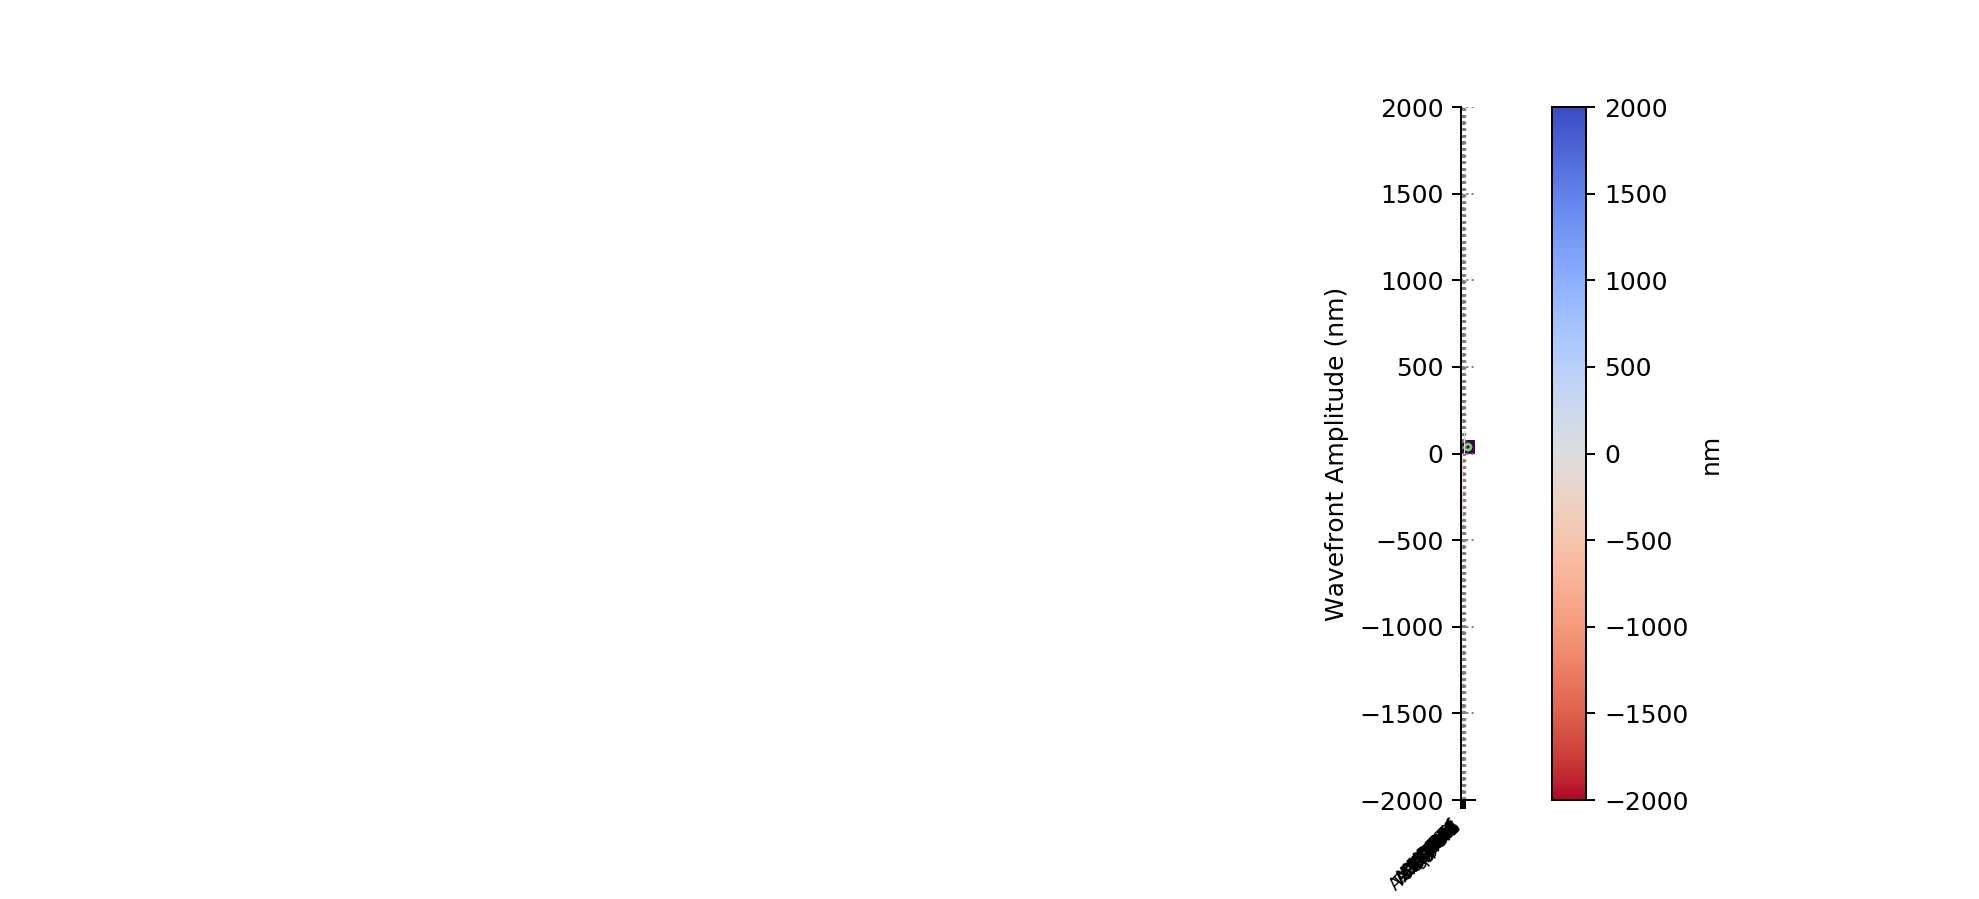

In [72]:
zv.fringe_bar_chart().show()

/Users/tim/conda/envs/py37/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


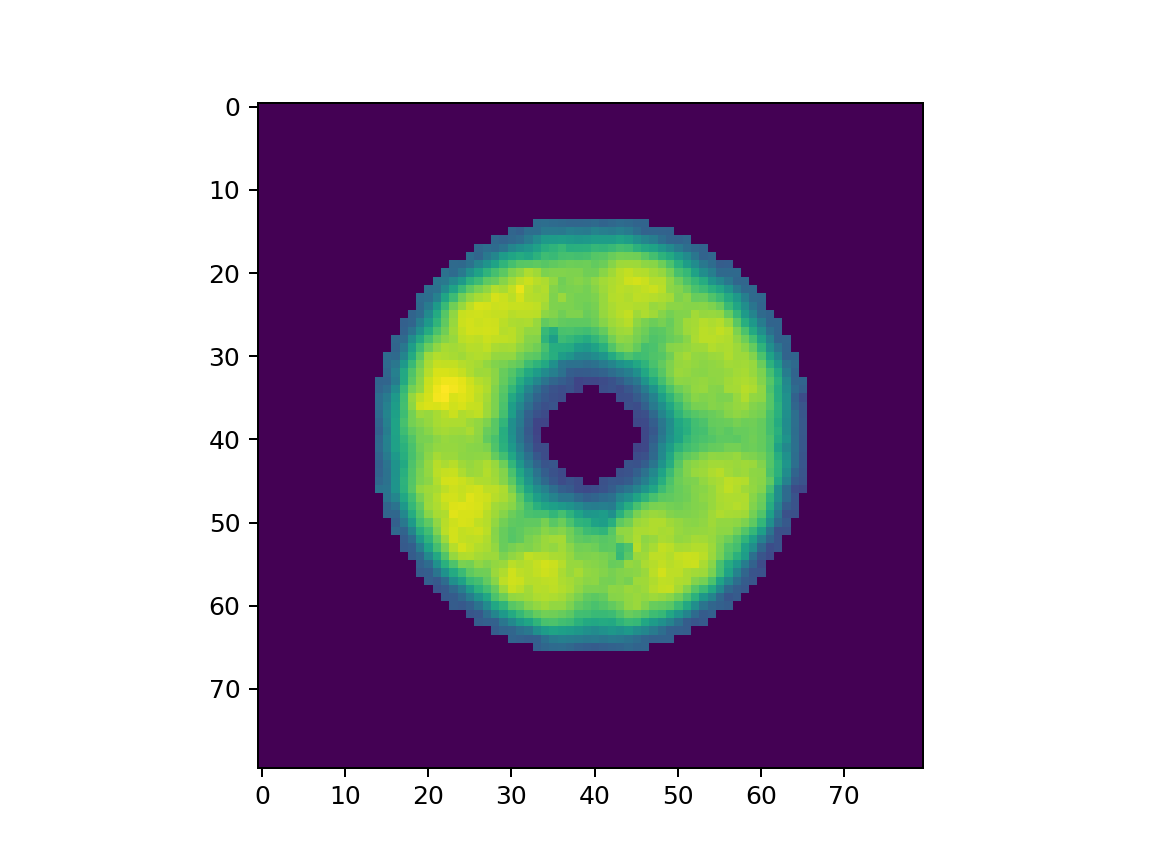

In [76]:
plt.imshow(algo.image)
plt.show()

<IPython.core.display.Javascript object>


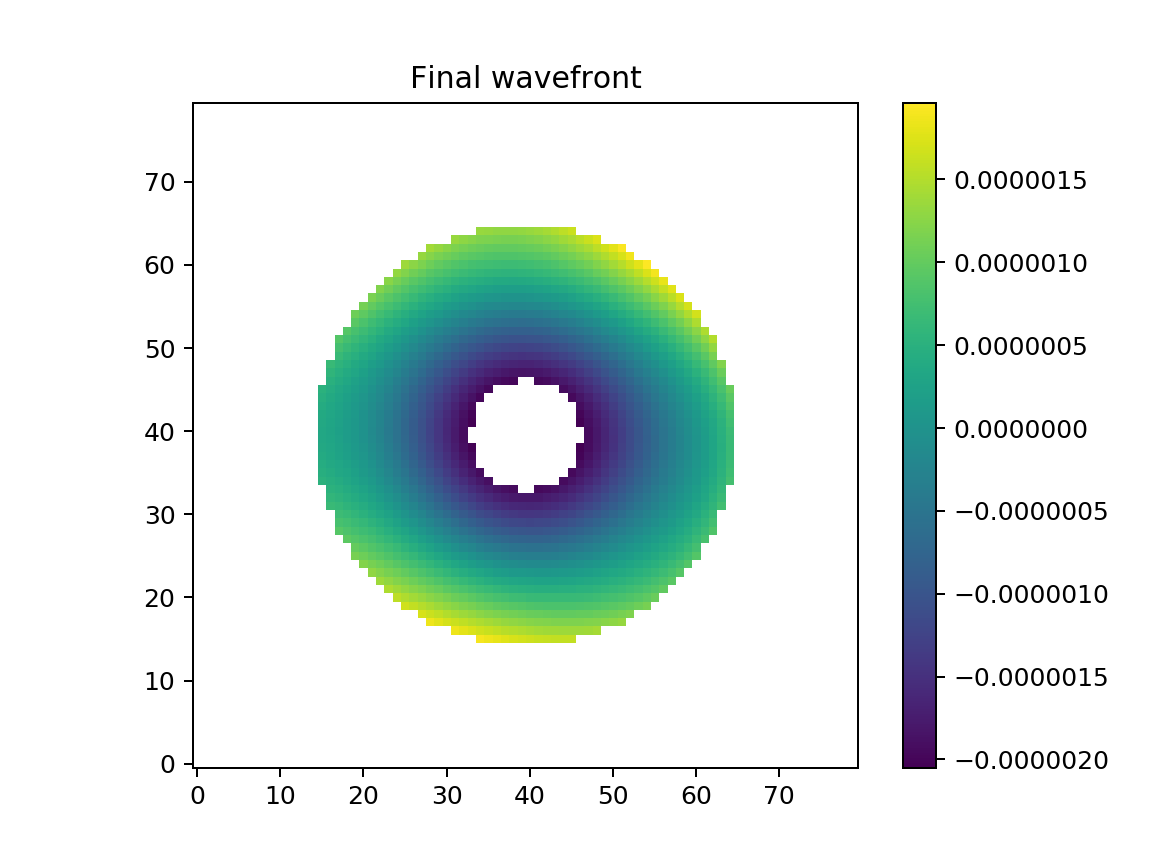

In [77]:
plots.plotImage(algo.Wconverge, "Final wavefront", show=True)

In [20]:
(10246.1 + 9245.18)/2 - zv['Z04'].value / 40.8

9682.895322692908

In [27]:
cam1 = zv['Z04'].value / 40.8
cam1

62.744677307090626

In [45]:
cam1_zv = zv.copy()

In [73]:
cam2_zv = zv.copy()

In [74]:
cam2 = cam2_zv['Z04'].value / 40.8
cam2

37.49428606214607

In [78]:
cam1_zv

Fringe Coefficients
 Z04:                  2560 nm 	 Defocus (2, 0)
 Z05:                -651.1 nm 	 Primary Astig at 45° (2, -2)
 Z06:                -192.7 nm 	 Primary Astig at 0° (2, 2)
 Z07:                -94.02 nm 	 Primary Y Coma (3, -1)
 Z08:                 267.3 nm 	 Primary X Coma (3, 1)
 Z09:                 265.5 nm 	 Y Trefoil (3, -3)
 Z10:                 -64.8 nm 	 X Trefoil (3, 3)
 Z11:                -19.57 nm 	 Primary Spherical (4, 0)
 Z12:                -69.98 nm 	 Secondary Astigmatism at 0° (4, 2)
 Z13:                -98.19 nm 	 Secondary Astigmatism at 45° (4, -2)
 Z14:                -81.45 nm 	 X Tetrafoil (4, 4)
 Z15:                -9.731 nm 	 Y Tetrafoil (4, -4)
 Z16:                 9.091 nm 	 Secondary X Coma (5, 1)
 Z17:                 -9.74 nm 	 Secondary Y Coma (5, -1)
 Z18:                  43.8 nm 	 Secondary X Trefoil (5, 3)
 Z19:                 102.6 nm 	 Secondary Y Trefoil (5, -3)
 Z20:                 52.77 nm 	 X Pentafoil (5, 5)
 Z21:    

In [79]:
cam2_zv

Fringe Coefficients
 Z04:                  1530 nm 	 Defocus (2, 0)
 Z05:                 270.9 nm 	 Primary Astig at 45° (2, -2)
 Z06:                -568.2 nm 	 Primary Astig at 0° (2, 2)
 Z07:                  37.5 nm 	 Primary Y Coma (3, -1)
 Z08:                 91.37 nm 	 Primary X Coma (3, 1)
 Z09:                 140.1 nm 	 Y Trefoil (3, -3)
 Z10:                 36.88 nm 	 X Trefoil (3, 3)
 Z11:                -355.8 nm 	 Primary Spherical (4, 0)
 Z12:                 36.11 nm 	 Secondary Astigmatism at 0° (4, 2)
 Z13:                     8 nm 	 Secondary Astigmatism at 45° (4, -2)
 Z14:                -154.8 nm 	 X Tetrafoil (4, 4)
 Z15:                -56.51 nm 	 Y Tetrafoil (4, -4)
 Z16:                 63.24 nm 	 Secondary X Coma (5, 1)
 Z17:                0.1286 nm 	 Secondary Y Coma (5, -1)
 Z18:                 39.59 nm 	 Secondary X Trefoil (5, 3)
 Z19:                 50.28 nm 	 Secondary Y Trefoil (5, -3)
 Z20:                 5.063 nm 	 X Pentafoil (5, 5)
 Z21:    

In [80]:
2560 - 1325

1235

In [81]:
1912 + 1530

3442